# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import random
import pandas as pd
import numpy as np
from functools import reduce

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
def ten_dicerolls():
    return pd.DataFrame(random.choices(range(1, 7), k=10), columns=["outcome"])

test_roll = ten_dicerolls()
test_roll

,outcome
0,4
1,4
2,5
3,4
4,3
5,3
6,6
7,4
8,4
9,1


#### 2.- Plot the results sorted by value.

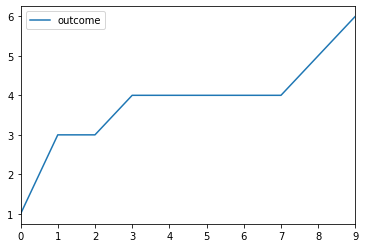

In [4]:
# your code here
sorted_rolls = test_roll.sort_values(by=["outcome"]).reset_index(drop=True)
sorted_rolls.plot()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

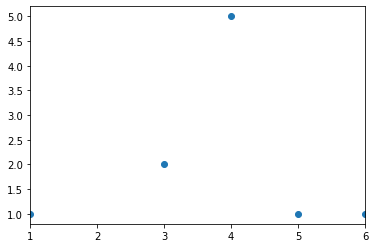

In [5]:
# your code here
freq = sorted_rolls["outcome"].value_counts()
freq.plot(style='o')

In [ ]:
"""
Each frequency on this graph (y-axis) indicates the number 
of rolls which resulted in a certain value (x-axis).
This information could be retrieved in the previous plot by
manually counting the number of turns (x-axis) in which a certain
value of the dice (y-axis) remained constant.
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
# your code here
# input as list
def manual_mean(lst):
    return reduce(lambda x,y: x+y, lst)/len(lst)

test = manual_mean([1,2,6,1,7,7])
test

4.0

In [7]:
# input as series
def manual_mean_pds(pds):
    lst = [pds.index[i]*pds.values[i] for i in range(pds.size)]
    return reduce(lambda x,y: x + y, lst)/pds.sum()

test = manual_mean_pds(pd.Series([2,1,1,2], index=[1,2,6,7]))
test

4.0

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here
freq = sorted_rolls["outcome"].value_counts()

mean = manual_mean_pds(freq)
mean

3.8

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [9]:
# your code here
def manual_median(lst):
    lst.sort()
    size = len(lst)
    if size%2==1:
        return lst[size//2]
    else:
        return (lst[(size//2)-1] + lst[size//2])/2

test = manual_median([1,2,6,1,7,7])
test

4.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [10]:
# your code here
def manual_quartiles(lst):
    lst.sort()
    size = len(lst)
    output = []
    output.append(manual_median(lst[0:size//2]))
    output.append(manual_median(lst))
    output.append(manual_median(lst[size//2:]))
    return output

test = manual_quartiles([1,2,6,1,7,7])
test

[1, 4.0, 7]

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

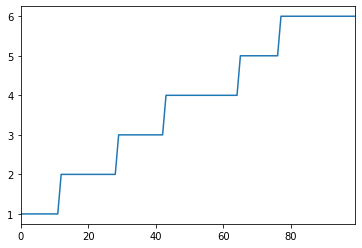

In [11]:
# your code here
df = pd.read_csv("../data/roll_the_dice_hundred.csv")

df_sorted = df.sort_values(by=["value"]).reset_index()["value"]
df_sorted.plot()

In [ ]:
"""
Some values occurred more frequently than others (longer "steps"),
but there is no one result of the dice roll that happens 
significantly more frequently than the others.
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [12]:
# your code here
mean = manual_mean(list(df_sorted.values))
mean

3.74

#### 3.- Now, calculate the frequency distribution.


In [13]:
# your code here
freq = df_sorted.value_counts()
freq

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

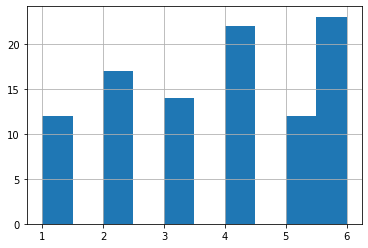

In [14]:
# your code here
df_sorted.hist()

In [ ]:
"""
Some columns are taller than others (values occurred more frequently)
but overall it is hard to identify any "peaks" where the rolls were
concentrated around a given value.

The mean is close to the middle of the range of possible values for X
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

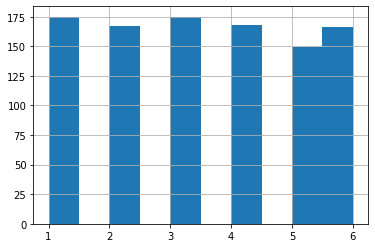

In [15]:
# your code here
df = pd.read_csv("../data/roll_the_dice_thousand.csv")

df_sorted = df.sort_values(by=["value"]).reset_index()["value"]
df_sorted.hist()

In [39]:
"""
The height of the columns of the histogram is more uniform.
The larger the sample, the more accurately it can represent
the total population. (All dice values occur with equal probability.)
"""

'\nThe height of the columns of the histogram is more uniform.\nThe larger the sample, the more accurately it can represent\nthe total population. (All dice values occur with equal probability.)\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

39.0    45
41.0    36
30.0    34
35.0    33
43.0    32
        ..
70.0     1
71.0     1
7.0      1
69.0     1
73.0     1
Name: observation, Length: 72, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120038450>]],
      dtype=object)

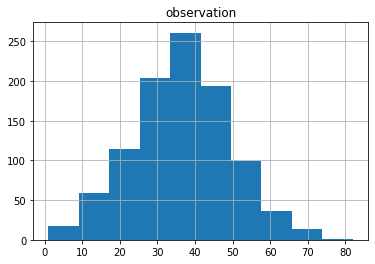

In [17]:
# your code here
ages = pd.read_csv("../data/ages_population.csv")
freq_ages = ages["observation"].value_counts()

print(freq_ages)
ages.hist()

# mean around 38?
# std around 20?

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [18]:
# your code here
print(round(ages["observation"].mean(), 2), round(ages["observation"].std(), 2))

36.56 12.82


In [ ]:
"""
Std was less than I expected, but the mean was ok... :)
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

28.0    139
27.0    125
26.0    120
29.0    115
25.0     98
30.0     90
24.0     78
31.0     61
23.0     41
22.0     35
32.0     31
33.0     22
21.0     17
20.0     13
34.0      7
35.0      3
19.0      3
36.0      2
Name: observation, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120145690>]],
      dtype=object)

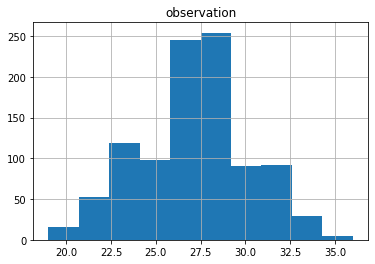

In [19]:
# your code here
ages2 = pd.read_csv("../data/ages_population2.csv")
freq_ages2 = ages2["observation"].value_counts()

print(freq_ages2)
ages2.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
Observation values are not as varied. Range is shorter (around 37-18=19).
Mean is probably located around 27. The distribution curve here is "sharper"
(there's a steep difference in observation frequencies just off the mean).
Does not appear to be a normal distribution.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [20]:
# your code here
print(round(ages2["observation"].mean(), 2), round(ages2["observation"].std(), 2))

27.16 2.97


In [ ]:
"""
Standard deviation is much smaller, because a greater number 
of observations are located closer to the mean in this case.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

32.0    37
35.0    31
37.0    31
39.0    29
36.0    26
        ..
76.0     1
9.0      1
1.0      1
5.0      1
7.0      1
Name: observation, Length: 75, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ffa6a50>]],
      dtype=object)

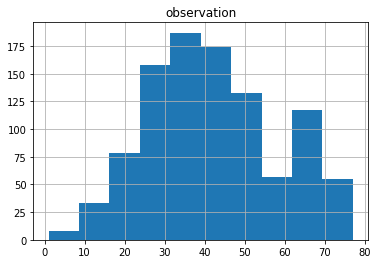

In [21]:
# your code here
ages3 = pd.read_csv("../data/ages_population3.csv")
freq_ages3 = ages3["observation"].value_counts()

print(freq_ages3)
ages3.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [22]:
# your code here
print(round(ages3["observation"].mean(), 2), round(ages3["observation"].std(), 2))

41.99 16.14


In [ ]:
"""
There is a second peak in observation frequencies closer to the right
end of the x-axis scale that skews this distribution to the right. 
Mean will be further to the right.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [23]:
# your code here
ages3.describe()["observation"][["25%", "50%", "75%", "max", "mean"]]

25%     30.000
50%     40.000
75%     53.000
max     77.000
mean    41.989
Name: observation, dtype: float64

In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""